In [1]:
from sys import platform, path

if platform == "linux" or platform == "linux2":
    path.append('/home/dariusbuhai/python/lib/python3.9/site-packages')
if platform == "darwin":
    path.append('/Library/Frameworks/Python.framework/Versions/3.9/venv/lib/python3.9/site-packages')

from prediction.regressor import Regressor
from prediction.regressor.regressor_old import Regressor as RegressorOld
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

In [2]:
def getOutputDifferences(all_outputs: np.array, all_targets: np.array, multiply_by: np.array) -> dict:
    result = {
        "perc_diff": None,
        "likes_diff": None
    }

    diff_pred = (all_outputs - all_targets) * multiply_by
    perc_pred = abs((all_targets / all_outputs) * 100)
    # Likes difference
    total_differences = [0, 0, 0, 0, 0, 0, 0, 0]
    differences = [1000, 5000, 10000, 50000, 100000, 200000, 500000, 1000000]
    differences_names = ['1K', '5K', '10K', '50K', '100K', '200K', '500K', '1M']
    for diff in diff_pred:
        idx = 0
        for difference_m in differences:
            if -difference_m < diff < difference_m:
                total_differences[idx] += 1
            idx += 1
    total_differences.append(diff_pred.shape[0] - total_differences[-1])
    differences_names.append('+1M')
    result["likes_diff"] = (differences_names, total_differences)
    result["perc_diff"] = perc_pred

    return result

In [9]:
def plotDifferences(x, y, labels, bar_1="M1", bar_2="M2"):
    br1 = np.arange(len(labels))
    br2 = [x + 0.4 for x in br1]
    plt.bar(br1, x, width=0.4, label=bar_1)
    plt.bar(br2, y, width=0.4, label=bar_2)
    plt.xticks([r + 0.4 for r in range(len(labels))], labels)
    plt.legend(loc='upper left')
    plt.show()

In [20]:
def plotBar(x, labels, bar="M2"):
    plt.bar(labels, x, label=bar)
    plt.legend(loc='upper left')
    plt.show()

In [5]:
regressor_old = RegressorOld()

/home/dariusbuhai/Desktop/Projects/InstagramLikesPredictions/prediction/regressor/regressor_old.py:75: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  msk = pd.np.random.rand(len(dataset)) < 0.8
/home/dariusbuhai/Desktop/Projects/InstagramLikesPredictions/prediction/regressor/regressor_old.py:78: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  msk2 = pd.np.random.rand(len(dataset2)) < 0.5


In [6]:
output_differences_old_1, output_differences_old_2 = dict(), dict()
if regressor_old.loadModel("best_model_0"):
    all_outputs_old, all_targets_old = regressor_old.evaluateModel(regressor_old.test_dl, detailed=True)
    output_differences_old_1 = getOutputDifferences(all_outputs_old, all_targets_old, regressor_old.test_ft['followers'])

if regressor_old.loadModel("best_model_5"):
    all_outputs_old, all_targets_old = regressor_old.evaluateModel(regressor_old.test_dl, detailed=True)
    output_differences_old_2 = getOutputDifferences(all_outputs_old, all_targets_old, regressor_old.test_ft['followers'])

Loaded best model!
Test accuracy: 
MSE:  0.001301814921599128
Mean absolute error:  0.018463764285411317
R2 score:  -477.81809676997875
Loaded best model!
Test accuracy: 
MSE:  0.0021083606606356513
Mean absolute error:  0.024689474544239344
R2 score:  -1.4214944737651791


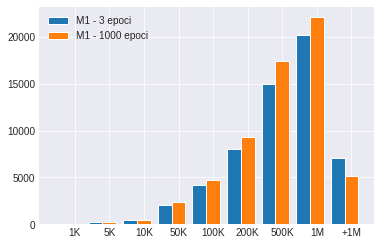

In [12]:
plotDifferences(output_differences_old_2['likes_diff'][1], output_differences_old_1['likes_diff'][1], output_differences_old_1['likes_diff'][0], "M1 - 3 epoci", "M1 - 1000 epoci")

In [13]:
regressor = Regressor()

/home/dariusbuhai/Desktop/Projects/InstagramLikesPredictions/prediction/regressor/__init__.py:88: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  msk = pd.np.random.rand(len(dataset)) < 0.8
/home/dariusbuhai/Desktop/Projects/InstagramLikesPredictions/prediction/regressor/__init__.py:91: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  msk2 = pd.np.random.rand(len(dataset2)) < 0.5


In [14]:
output_differences = dict()
if regressor.loadModel("best_model"):
    all_outputs, all_targets = regressor.evaluateModel(regressor.test_dl, detailed=True)
    output_differences = getOutputDifferences(all_outputs, all_targets, regressor.test_ft['mean'])

Loaded best model!
Test accuracy: 
MSE:  0.7826870982138708
Mean absolute error:  0.5097087661773592
R2 score:  -1.821720201572762



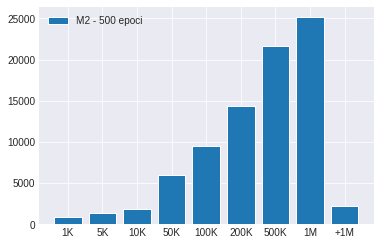

{'perc_diff': array([ 79.80302913, 184.70541074,  81.93135898, ...,  37.39746664,
         7.03410866,   3.53572077]), 'likes_diff': (['1K', '5K', '10K', '50K', '100K', '200K', '500K', '1M', '+1M'], [887, 1349, 1893, 6007, 9537, 14332, 21683, 25154, 2187])}


In [22]:
plotBar(output_differences['likes_diff'][1], output_differences['likes_diff'][0], "M2 - 500 epoci")
print(output_differences)

{'perc_diff': (['.0001', '.0005', '.001', '.01', '.1', '1'], [142, 693, 1406, 14950, 26861, 27461]), 'likes_diff': (['1K', '5K', '10K', '50K', '100K', '200K', '500K', '1M', '+1M'], [47, 185, 410, 2115, 4230, 8567, 17288, 22262, 5199])}

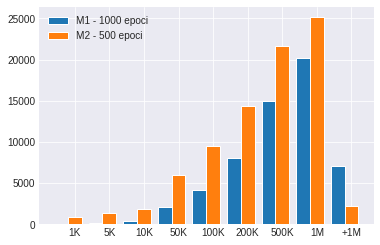

In [23]:
plotDifferences(output_differences_old_2['likes_diff'][1], output_differences['likes_diff'][1], output_differences['likes_diff'][0], "M1 - 1000 epoci", "M2 - 500 epoci")

Test accuracy:
MSE:  0.001235819818950113
Mean absolute error:  0.01801587314227801
R2 score:  -97.39407233239692

125.29423435609337


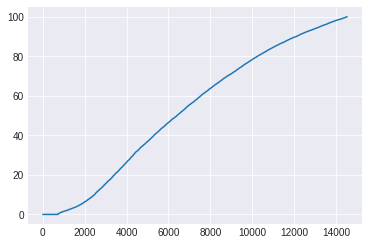

In [12]:
perc_differences = sorted([x for x in list(output_differences['perc_diff']) if x <= 100]) #sorted(, reverse=False)
print(sum([x for x in list(output_differences['perc_diff'])]) / len([x for x in list(output_differences['perc_diff'])]))
plt.plot([x for x in range(len(perc_differences))], perc_differences)
plt.show()

In [13]:
from prediction.regressor import formatThousands

for i in range(0, 10):
    likes = regressor.predict(regressor.test_ft.iloc[i])
    print(f"Actual likes: {formatThousands(regressor.test_ft.iloc[i]['likes'])}. Predicted: {formatThousands(likes * regressor.test_ft.iloc[i]['mean'])}")

Actual likes: 8,679,568.0. Predicted: 9,431,033.624630304
Actual likes: 2,916,382.0. Predicted: 8,337,935.624722859
Actual likes: 10,179,238.0. Predicted: 9,155,620.311589204
Actual likes: 7,402,406.0. Predicted: 5,803,477.1738480115
Actual likes: 16,248,054.0. Predicted: 10,967,080.833496956
Actual likes: 4,741,142.0. Predicted: 5,066,884.753819872
Actual likes: 10,398,740.0. Predicted: 3,479,554.444000191
Actual likes: 13,157,877.0. Predicted: 8,726,794.983380293
Actual likes: 4,099,582.0. Predicted: 4,687,636.278011638
Actual likes: 6,724,414.0. Predicted: 6,076,847.711805673
